In [1]:
import pandas as pd

data = pd.read_csv("letter-recognition.csv")
data.sample(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
10670,R,6,10,8,8,7,8,8,6,6,6,5,7,3,6,6,9
9926,T,5,7,5,5,3,7,10,2,8,11,9,4,1,11,3,5
5899,Y,5,5,6,7,6,9,11,5,4,6,7,7,5,10,7,5
5524,R,5,11,7,8,6,8,8,5,6,9,4,8,3,7,5,11
14412,C,4,7,5,5,5,5,7,3,5,8,6,11,6,9,4,9


In [2]:
X = data.drop(columns=['letter'])
Y = data['letter']

In [7]:
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
y = lr.fit_transform(Y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 2.1100 - accuracy: 0.4001 - val_loss: 1.1896 - val_accuracy: 0.6881
Epoch 2/20
225/225 [==============================] - 1s 6ms/step - loss: 1.2022 - accuracy: 0.6296 - val_loss: 0.8743 - val_accuracy: 0.7525
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 0.9986 - accuracy: 0.6915 - val_loss: 0.7403 - val_accuracy: 0.7850
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 0.8809 - accuracy: 0.7247 - val_loss: 0.6570 - val_accuracy: 0.8100
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 0.7867 - accuracy: 0.7540 - val_loss: 0.5829 - val_accuracy: 0.8338
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.7273 - accuracy: 0.7713 - val_loss: 0.5343 - val_accuracy: 0.8462
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 0.6795 - accuracy: 0.7878 - val_loss: 0.4870 - val_accuracy: 0.8619
Epoch 

In [13]:
y_prob = model.predict(X_test_scaled)
y_pred = y_prob.argmax(axis=1)

125/125 [==============================] - 0s 2ms/step


125/125 [==============================] - 0s 2ms/step


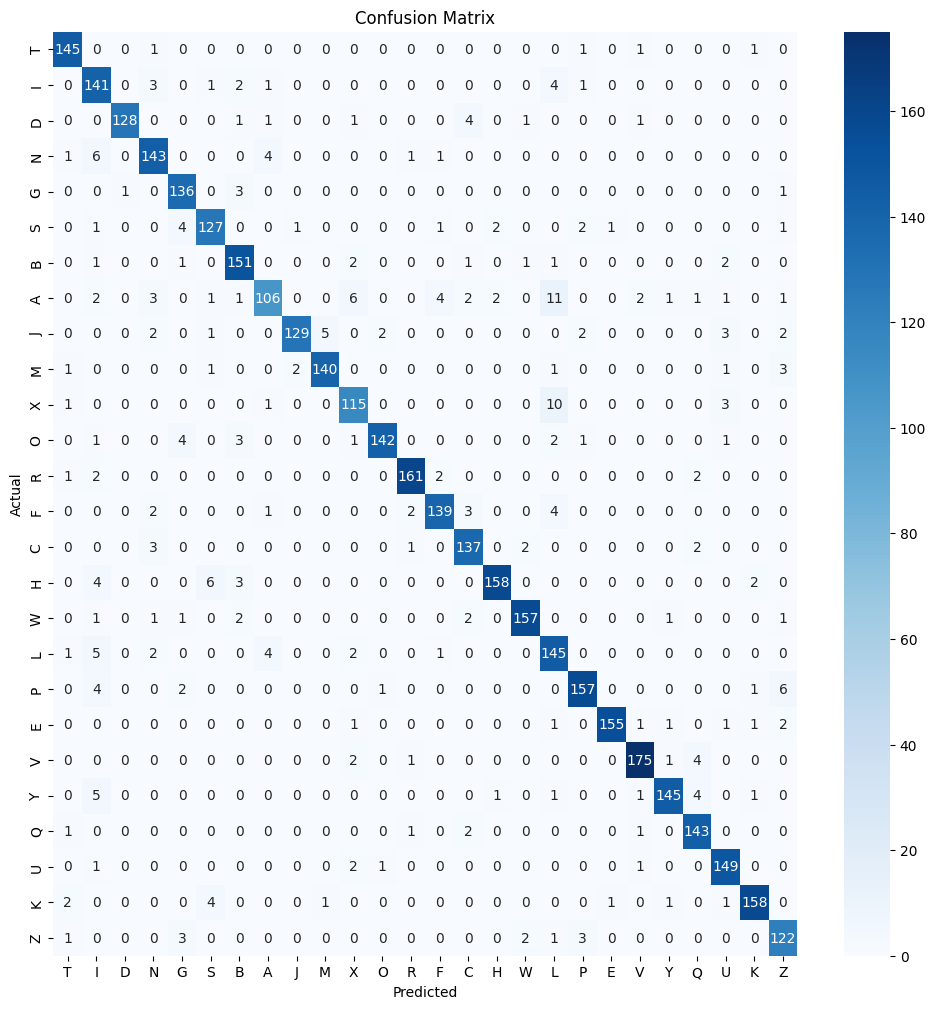

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

p = lr.inverse_transform(predicted_labels)
t = lr.inverse_transform(y_test)

conf_matrix = confusion_matrix(t, p)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['letter'].unique(), yticklabels=data['letter'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()